In [11]:
import matplotlib.pyplot as plt
import itertools as it
import random
import copy

In [16]:
class Schelling:
    def __init__(self, width, height, empty_ratio, similarity_threshold, n_iterations, races = 2):
        self.width = width
        self.height = height
        self.races = races
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.empty_houses = []
        self.agents = {}
        
    def populate(self):
        """
        The populate method is used at the beginning of the simulation.
        This method randomly distributes people in the grid.
        """
        self.all_houses = list(it.product(range(self.width), range(self.height)))
        random.shuffle(self.all_houses)
        
        self.n_empty = int(self.empty_ratio * len(self.all_houses))
        self.empty_houses = self.all_houses[:self.n_empty]
        
        self.remaining_houses = self.all_houses[self.n_empty:]
        houses_by_race = [self.remaining_houses[i::self.races] for i in range(self.races)]
        agents = []
        for i in range(self.races):
            # create agents for each race
            agents += list(zip(houses_by_race[i], [i + 1] * len(houses_by_race[i])))
        self.agents = dict(agents)
        
    def is_unhappy(self, x, y):
        race = self.agents[(x, y)]
        count_similar = 0
        count_different = 0
        
        if x > 0 and y > 0 and (x - 1, y - 1) not in self.empty_houses:
            if self.agents[(x - 1, y - 1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if y > 0 and (x, y - 1) not in self.empty_houses:
            if self.agents[(x, y - 1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x < (self.width - 1) and y > 0 and (x + 1, y - 1) not in self.empty_houses:
            if self.agents[(x + 1, y - 1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x > 0 and (x - 1, y) not in self.empty_houses:
            if self.agents[(x - 1, y)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x < (self.width - 1) and (x + 1, y) not in self.empty_houses:
            if self.agents[(x + 1, y)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x > 0 and y < (self.height - 1) and (x - 1, y + 1) not in self.empty_houses:
            if self.agents[(x - 1, y + 1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x > 0 and y < (self.height - 1) and (x, y + 1) not in self.empty_houses:
            if self.agents[(x, y + 1)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x < (self.width - 1) and y < (self.height - 1) and (x + 1, y + 1) not in self.empty_houses:
            if self.agents[(x + 1, y + 1)] == race:
                count_similar += 1
            else:
                count_different += 1
                
        if (count_similar + count_different) == 0:
            return False
        else:
            return float(count_similar) / (count_similar + count_different) < self.similarity_threshold
        
    def update(self):
        for i in range(self.n_iterations):
            self.old_agents = copy.deepcopy(self.agents)
            n_changes = 0
            for agent in self.old_agents:
                if self.is_unhappy(agent[0], agent[1]):
                    agent_race = self.agents[agent]
                    empty_house = random.choice(self.empty_houses)
                    self.agents[empty_house] = agent_race
                    del self.agents[agent]
                    self.empty_houses.remove(empty_house)
                    self.empty_houses.append(agent)
                    n_changes += 1
            print(n_changes)
            if n_changes == 0:
                break
                
    def move_to_empty(self, x, y):
        race = self.agents[(x, y)]
        empty_house = random.choice(self.empty_houses)
        self.updated_agents[empty_house] = race
        del self.updated_agents[(x, y)]
        self.empty_houses.remove(empty_house)
        self.empty_houses.append((x, y))
    
    def plot(self, title, file_name):
        fig, ax = plt.subplots(figsize=(10, 10))
        # If you want to run the simulation with more than 7 colors, you should set agent_colors accordingly
        agent_colors = {1: 'b', 2: 'r', 3: 'g', 4: 'c', 5: 'm', 6: 'y', 7: 'k'}
        for agent in self.agents:
            ax.scatter(agent[0] + 0.5, agent[1] + 0.5, color=agent_colors[self.agents[agent]])
            
        ax.set_title(title, fontsize=10, fontweight='bold')
        ax.set_xlim([0, self.width])
        ax.set_ylim([0, self.height])
        ax.set_xticks([])
        ax.set_yticks([])
        plt.savefig(file_name)

In [13]:
schelling_1 = Schelling(50, 50, 0.3, 0.6, 500, 2)
schelling_1.populate()
print(schelling_1.agents)

{(22, 27): 1, (27, 38): 1, (44, 25): 1, (13, 48): 1, (19, 34): 1, (2, 46): 1, (22, 4): 1, (22, 11): 1, (1, 13): 1, (4, 37): 1, (0, 14): 1, (15, 40): 1, (44, 47): 1, (21, 15): 1, (27, 11): 1, (34, 37): 1, (29, 11): 1, (3, 40): 1, (47, 24): 1, (43, 39): 1, (5, 26): 1, (7, 5): 1, (35, 0): 1, (17, 2): 1, (14, 48): 1, (37, 27): 1, (33, 16): 1, (38, 7): 1, (27, 15): 1, (38, 36): 1, (30, 14): 1, (1, 49): 1, (44, 1): 1, (28, 5): 1, (6, 36): 1, (35, 43): 1, (44, 7): 1, (0, 49): 1, (37, 7): 1, (26, 22): 1, (0, 31): 1, (20, 14): 1, (25, 44): 1, (23, 0): 1, (43, 21): 1, (16, 24): 1, (19, 49): 1, (1, 12): 1, (4, 24): 1, (46, 31): 1, (37, 29): 1, (32, 19): 1, (45, 38): 1, (2, 0): 1, (17, 43): 1, (11, 10): 1, (4, 35): 1, (35, 19): 1, (20, 39): 1, (33, 21): 1, (22, 44): 1, (48, 0): 1, (15, 49): 1, (32, 44): 1, (40, 7): 1, (27, 30): 1, (17, 5): 1, (44, 48): 1, (28, 29): 1, (24, 31): 1, (13, 12): 1, (9, 47): 1, (48, 24): 1, (38, 5): 1, (6, 10): 1, (7, 39): 1, (45, 25): 1, (5, 39): 1, (39, 18): 1, (25, 2

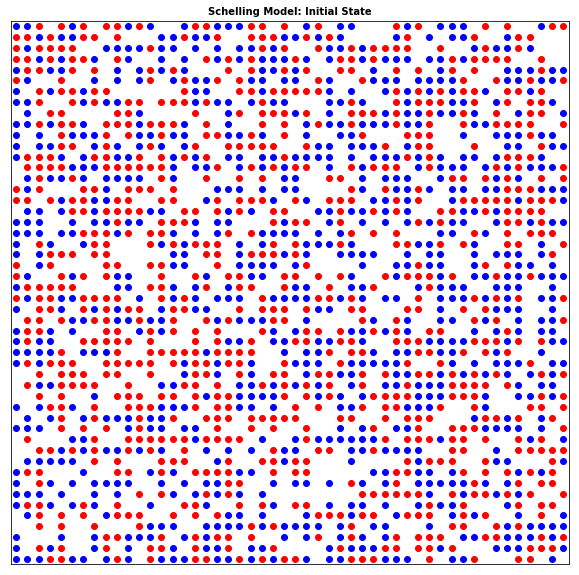

In [14]:
schelling_1.plot('Schelling Model: Initial State', 'schelling_initial.png')

1005
570
380
290
213
158
122
85
75
63
46
27
23
19
9
8
10
6
6
6
4
4
4
3
3
3
2
3
1
2
2
2
2
0


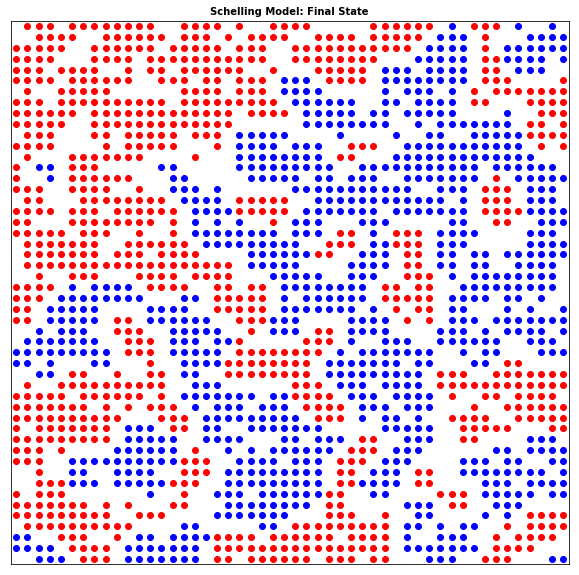

In [5]:
schelling_1.update()
schelling_1.plot('Schelling Model: Final State', 'schelling_final.png')

In [7]:
all_houses = list(it.product([1, 2], ['a', 'b']))
all_houses

[(1, 'a'), (1, 'b'), (2, 'a'), (2, 'b')]

In [8]:
random.shuffle(all_houses)
all_houses

[(2, 'a'), (1, 'a'), (1, 'b'), (2, 'b')]

In [9]:
print(len(all_houses))
empty_ratio = 0.25
n_empty = int(empty_ratio * len(all_houses))
print(n_empty)
empty_houses = all_houses[:n_empty]
empty_houses

4
1


[(2, 'a')]

In [10]:
remaining_houses = all_houses[n_empty:]
remaining_houses

[(1, 'a'), (1, 'b'), (2, 'b')]

In [15]:
races = 2
print([remaining_houses[0::races]])
print([remaining_houses[1::races]])

[[(2, 'a'), (1, 'b')]]
[[(2, 'b')]]


In [16]:
houses_by_race = [remaining_houses[i::races] for i in range(races)]
print(houses_by_race[0])
print(houses_by_race[1])

[(2, 'a'), (1, 'b')]
[(2, 'b')]


In [17]:
x = [1, 2, 3]
y = [4, 5, 6]
zipped = zip(x, y)
list(zipped)

[(1, 4), (2, 5), (3, 6)]

In [18]:
x = houses_by_race[0]
print("x = " + str(x))
y = [1] * len(houses_by_race[0])
print("y = " + str(y))

x = [(2, 'a'), (1, 'b')]
y = [1, 1]


In [19]:
zipped1 = zip(houses_by_race[0], [1] * len(houses_by_race[0]))
zipped1_lst = list(zipped1)
zipped1_lst

[((2, 'a'), 1), ((1, 'b'), 1)]

In [20]:
zipped2 = zip(houses_by_race[1], [2] * len(houses_by_race[1]))
zipped2_lst = list(zipped2)
zipped2_lst

[((2, 'b'), 2)]

In [21]:
zipped1_lst + zipped2_lst

[((2, 'a'), 1), ((1, 'b'), 1), ((2, 'b'), 2)]

In [22]:
dict(zipped1_lst + zipped2_lst)

{(1, 'b'): 1, (2, 'a'): 1, (2, 'b'): 2}